# traycer demo

Scanlines rendered: 100%|██████████| 450/450 [20:16<00:00,  2.70s/it]


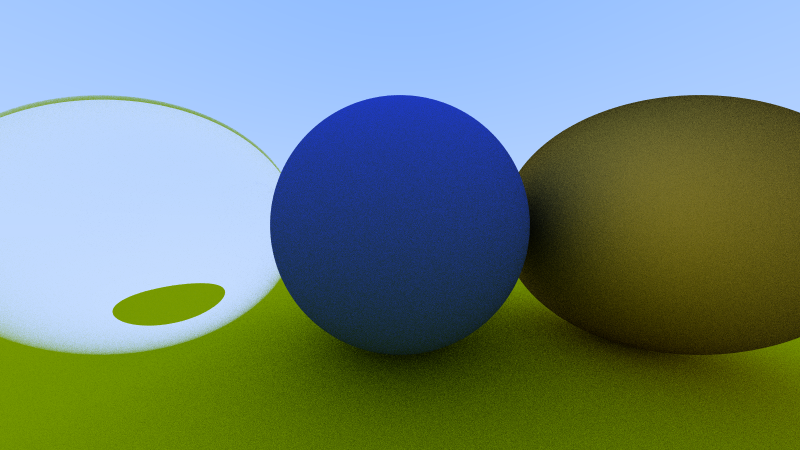

In [3]:
import traycer
import importlib
importlib.reload(traycer)
from PIL import Image
from tqdm import tqdm

# filename
fname = "test.ppm"

# materials
material_ground = traycer.lambertain(traycer.color(0.8,0.8,0.0))
material_center = traycer.lambertain(traycer.color(0.2,0.3,0.8))
material_left   = traycer.metal(traycer.color(0.8,0.8,0.8), fuzz=0.1)
material_right  = traycer.metal(traycer.color(0.8,0.6,0.2), fuzz=1.0)
material_glass  = traycer.dielectric(theta=1.1)

# world
world = traycer.hittable_list()
world.add(traycer.sphere(traycer.point3( 0.0, -100.5, -1.0), 100.0, material_ground))
#world.add(traycer.sphere(traycer.point3( 0.0,    0.0, -1.0), 0.5, material_center))
world.add(traycer.sphere(traycer.point3( 0.0,    0.0, -1.0), -0.5, material_center))
world.add(traycer.sphere(traycer.point3(-1.0,    0.0, -1.0), 0.5, material_glass))
world.add(traycer.sphere(traycer.point3( 1.0,    0.0, -1.0), 0.5, material_right))

cam = traycer.camera(image_width=800)
image = cam.render(world, aa=100, max_depth=10)
image.write(fname)
display(Image.open(fname))
